# Using linear regression to predict NBA teams win percentages based on the basketball 'four factors'

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [10]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguedashteamstats

In [11]:
#create datasets for the testing --> four factors of each team

#create dataframe of april four factors of each team in current season
teamsperformance = leaguedashteamstats.LeagueDashTeamStats(season='2020-21',
                                        measure_type_detailed_defense='Four Factors').get_data_frames()[0]
teamsperformance = teamsperformance.sort_values('TEAM_ID')
teamsperformance.drop(teamsperformance.columns.difference(['W_PCT','EFG_PCT',
                                                           'FTA_RATE','TM_TOV_PCT','OREB_PCT',
                                                           'OPP_EFG_PCT',
                                                          'OPP_FTA_RATE','OPP_TOV_PCT','OPP_OREB_PCT'])
                                                                 , 1, inplace=True)

In [12]:
#create training data

teamsperformance2020 = leaguedashteamstats.LeagueDashTeamStats(season='2019-20',
                                        measure_type_detailed_defense='Four Factors').get_data_frames()[0]
teamsperformance2020 = teamsperformance2020.sort_values('TEAM_ID')
teamsperformance2020.drop(teamsperformance2020.columns.difference(['W_PCT','EFG_PCT',
                                                           'FTA_RATE','TM_TOV_PCT','OREB_PCT',
                                                           'OPP_EFG_PCT',
                                                          'OPP_FTA_RATE','OPP_TOV_PCT','OPP_OREB_PCT'])
                                                                 , 1, inplace=True)

teamsperformance2019 = leaguedashteamstats.LeagueDashTeamStats(season='2018-19',
                                        measure_type_detailed_defense='Four Factors').get_data_frames()[0]
teamsperformance2019 = teamsperformance2019.sort_values('TEAM_ID')
teamsperformance2019.drop(teamsperformance2019.columns.difference(['W_PCT','EFG_PCT',
                                                           'FTA_RATE','TM_TOV_PCT','OREB_PCT',
                                                           'OPP_EFG_PCT',
                                                          'OPP_FTA_RATE','OPP_TOV_PCT','OPP_OREB_PCT'])
                                                                 , 1, inplace=True)

teamsperformance2018 = leaguedashteamstats.LeagueDashTeamStats(season='2017-18',
                                        measure_type_detailed_defense='Four Factors').get_data_frames()[0]
teamsperformance2018 = teamsperformance2018.sort_values('TEAM_ID')
teamsperformance2018.drop(teamsperformance2018.columns.difference(['W_PCT','EFG_PCT',
                                                           'FTA_RATE','TM_TOV_PCT','OREB_PCT',
                                                           'OPP_EFG_PCT',
                                                          'OPP_FTA_RATE','OPP_TOV_PCT','OPP_OREB_PCT'])
                                                                 , 1, inplace=True)

teamsperformance2017 = leaguedashteamstats.LeagueDashTeamStats(season='2016-17',
                                        measure_type_detailed_defense='Four Factors').get_data_frames()[0]
teamsperformance2017 = teamsperformance2017.sort_values('TEAM_ID')
teamsperformance2017.drop(teamsperformance2017.columns.difference(['W_PCT','EFG_PCT',
                                                           'FTA_RATE','TM_TOV_PCT','OREB_PCT',
                                                           'OPP_EFG_PCT',
                                                          'OPP_FTA_RATE','OPP_TOV_PCT','OPP_OREB_PCT'])
                                                                 , 1, inplace=True)



In [13]:
#merge the two dataframes

teamsperformance_test = pd.concat([teamsperformance2019,
                                   teamsperformance2020,teamsperformance2018,teamsperformance2017], ignore_index=True)


In [14]:
predict = "W_PCT"

X_train = np.array(teamsperformance_test.drop([predict],1))

Y_train = np.array(teamsperformance_test[predict])

X_test = np.array(teamsperformance.drop([predict],1))

Y_test = np.array(teamsperformance[predict])


linear = linear_model.LinearRegression()

linear.fit(X_train, Y_train)


acc = linear.score(X_test,Y_test)
print("Accuracy: ",round(acc,3))

print("Co: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)

Accuracy:  0.882
Co: 
 [ 5.1450666   0.51360365 -3.96250379  1.80964059 -4.603686   -0.54025971
  3.3053348  -1.13373453]
Intercept: 
 0.13537231640192643


In [15]:
predictions = linear.predict(X_test)

for i in range(len(predictions)):
    print(round(predictions[i],3), X_test[i], Y_test[i])

0.588 [0.539 0.278 0.133 0.284 0.53  0.237 0.124 0.258] 0.569
0.556 [0.543 0.234 0.141 0.289 0.539 0.273 0.142 0.263] 0.5
0.253 [0.508 0.261 0.157 0.28  0.556 0.235 0.145 0.271] 0.306
0.524 [0.537 0.293 0.144 0.302 0.55  0.236 0.132 0.245] 0.431
0.478 [0.547 0.197 0.151 0.267 0.538 0.253 0.127 0.233] 0.431
0.586 [0.55  0.242 0.123 0.253 0.534 0.259 0.129 0.266] 0.583
0.645 [0.557 0.219 0.136 0.292 0.545 0.258 0.143 0.249] 0.653
0.532 [0.551 0.239 0.146 0.222 0.522 0.286 0.146 0.273] 0.542
0.274 [0.521 0.252 0.145 0.24  0.555 0.256 0.144 0.277] 0.236
0.689 [0.564 0.222 0.135 0.27  0.531 0.239 0.132 0.246] 0.653
0.584 [0.536 0.271 0.152 0.269 0.526 0.237 0.152 0.252] 0.583
0.522 [0.546 0.252 0.144 0.24  0.542 0.234 0.154 0.267] 0.556
0.688 [0.566 0.233 0.134 0.269 0.536 0.202 0.127 0.245] 0.639
0.35 [0.52  0.254 0.139 0.271 0.556 0.264 0.149 0.283] 0.319
0.679 [0.575 0.258 0.134 0.252 0.531 0.241 0.125 0.274] 0.667
0.56 [0.524 0.242 0.133 0.264 0.509 0.257 0.131 0.262] 0.569
0.223 [0.49 

In [32]:
corr = teamsperformance.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,W_PCT,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
W_PCT,1.00,0.81,-0.15,-0.34,0.17,-0.68,-0.09,-0.24,-0.38
EFG_PCT,0.81,1.00,-0.26,-0.17,0.05,-0.41,0.03,-0.21,-0.24
FTA_RATE,-0.15,-0.26,1.00,0.23,0.17,0.02,0.04,0.16,0.13
TM_TOV_PCT,-0.34,-0.17,0.23,1.00,0.15,0.08,-0.11,0.29,-0.14
OREB_PCT,0.17,0.05,0.17,0.15,1.00,0.01,-0.21,-0.12,-0.43
OPP_EFG_PCT,-0.68,-0.41,0.02,0.08,0.01,1.00,0.00,0.23,0.31
OPP_FTA_RATE,-0.09,0.03,0.04,-0.11,-0.21,0.00,1.00,0.51,0.43
OPP_TOV_PCT,-0.24,-0.21,0.16,0.29,-0.12,0.23,0.51,1.00,0.48
OPP_OREB_PCT,-0.38,-0.24,0.13,-0.14,-0.43,0.31,0.43,0.48,1.00


In [16]:
teams = leaguedashteamstats.LeagueDashTeamStats(season='2020-21',
                                        measure_type_detailed_defense='Four Factors').get_data_frames()[0]
teams = teams.sort_values('TEAM_ID')
teams.drop(teams.columns.difference([
            "TEAM_NAME",'W_PCT']), 1, inplace=True)
teams = teams.reset_index(drop=True)

predictions_df = pd.DataFrame(predictions, columns = ['Predicted WIN PCT'])
predicted_wins = teams.join(predictions_df)

difference =  (predicted_wins['Predicted WIN PCT'] - predicted_wins['W_PCT'])*100

difference_df = pd.DataFrame(difference, columns = ['difference %'])

predicted_wins = predicted_wins.join(difference_df)

games_in_season = 72

predicted_wins["Predicted Ws"] = round((predicted_wins['Predicted WIN PCT'] * games_in_season),0)
predicted_wins["Predicted Ls"] = (games_in_season - round((predicted_wins['Predicted WIN PCT'] * games_in_season),0))

print(predicted_wins.sort_values('Predicted Ws',ascending=False))


predicted_wins.to_csv("LinearRegression.csv", sep='\t')

                 TEAM_NAME  W_PCT  Predicted WIN PCT  difference %  \
25               Utah Jazz  0.722           0.767340      4.533993   
12         Milwaukee Bucks  0.639           0.688272      4.927187   
9              LA Clippers  0.653           0.688601      3.560099   
18      Philadelphia 76ers  0.681           0.674753     -0.624746   
14           Brooklyn Nets  0.667           0.679113      1.211300   
19            Phoenix Suns  0.708           0.661350     -4.665039   
6           Denver Nuggets  0.653           0.645135     -0.786475   
0            Atlanta Hawks  0.569           0.587633      1.863282   
5         Dallas Mavericks  0.583           0.586421      0.342134   
10      Los Angeles Lakers  0.583           0.583937      0.093674   
26       Memphis Grizzlies  0.528           0.553559      2.555938   
1           Boston Celtics  0.500           0.555908      5.590753   
15         New York Knicks  0.569           0.560249     -0.875110   
20  Portland Trail B

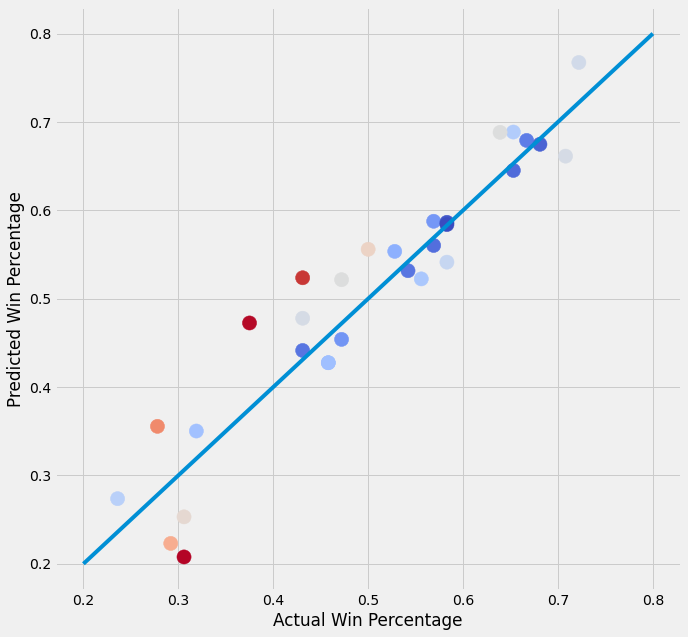

In [38]:
import matplotlib.style as style
plt.style.use('fivethirtyeight')
plt.scatter(predicted_wins['W_PCT'],predicted_wins['Predicted WIN PCT'],c= np.sqrt(predicted_wins["difference %"] ** 2),
            cmap="coolwarm",s=200)
plt.plot([0.2, 0.8], [0.2, 0.8])

plt.xlabel("Actual Win Percentage")
plt.ylabel("Predicted Win Percentage")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig('FourFactors.png')

# Problems with the model

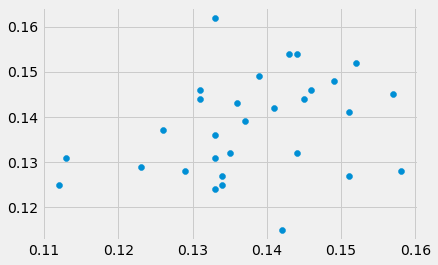

In [34]:
plt.scatter(teamsperformance['TM_TOV_PCT'],teamsperformance['OPP_TOV_PCT']);
plt.show()

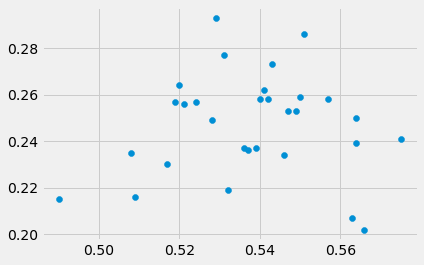

In [36]:
plt.scatter(teamsperformance['EFG_PCT'],teamsperformance['OPP_FTA_RATE']);
plt.show()

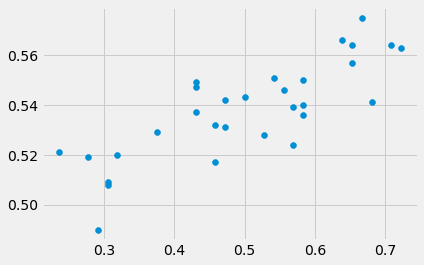

In [37]:
plt.scatter(teamsperformance['W_PCT'],teamsperformance['EFG_PCT']);
plt.show()

You could likely model a teams success off of their EFG% but this will most likely favour good offensive teams over good defensive teams. The four factors model allows for less effective offensive teams to be predicted more accurately since it considers their ability to stop opposition from shooting as good of a percentage or generating more possessions through offesnive rebounds and forcing turnovers.